In [1]:
def normalize(df):
    return df.str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8').str.replace("$","").str.replace("(","").str.replace(")","").str.replace('-','').str.replace(' ','_').str.lower().str.replace('.','')

In [59]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999

pd.options.display.max_colwidth = 100

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot, offline
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import requests

from datetime import datetime

today = datetime.today().strftime('%Y-%m-%d')

In [3]:
ajaxurl = 'https://thevirustracker.com/timeline/map-data.json'
r = requests.get(ajaxurl)

In [4]:
date = [] 
df = pd.DataFrame()
for i in range(len(r.json())):
    dd = pd.DataFrame.from_records(r.json()[i]['data'])
    dd['date'] = r.json()[i]['date']
    
    df = pd.concat([df,dd],axis=0)

In [5]:
columns = list(df.columns)[-1:] + list(df.columns)[:-1]
df = df[columns]

In [6]:
mask = df['totalcases']!=''

df = df[mask]

### Covid Consolidado

In [22]:
df = pd.read_excel('../data/covid_17_03.xlsx')
mask = df['Cases']!=0
df = df[mask]

df.columns = normalize(df.columns)

df['count'] = 1

df['daterep'] = pd.to_datetime(df['daterep'])
df = df.sort_values(by='daterep')

total_casos = df[['cases','geoid']].groupby(by = ['geoid',]).cumsum()['cases'].tolist()
df['total_cases'] = total_casos

total_deaths = df[['deaths','geoid']].groupby(by = ['geoid',]).cumsum()['deaths'].tolist()
df['total_deaths'] = total_deaths

In [23]:
# since_case = 98
# mask = df['total_cases']>=since_case
# df = df[mask]


since_first_day = df[['count','geoid']].groupby(by = ['geoid',]).cumsum()['count'].tolist()
df['since_first_day'] = since_first_day

In [70]:
mask = (df['geoid']=='BR') | (df['geoid']=='IT') | (df['geoid']=='ES') | (df['geoid']=='US') | (df['geoid']=='CN') | (df['geoid']=='KR') | (df['geoid']=='UK') | (df['geoid']=='FR') | (df['geoid']=='DE')

dd = df[mask]
dd['total_cases_log'] = np.log(dd['total_cases'])

In [71]:
data = []
wid = 6
marker_size = 10

for geoid in dd['geoid'].unique():
    
    mask = (dd['geoid']==geoid)

    trace = go.Scatter(
    name=dd[mask]['countries_and_territories'].str.replace('_',' ').tolist()[0],
    x=dd[mask]['since_first_day'], 
    y=dd[mask]['total_cases'],
#     line=dict(color='#a14900', width=wid),
    line=dict(width=wid),
    mode='lines+markers',
    marker=dict(size=marker_size),
    hoverlabel=dict(namelength=-1, font=dict(size=18))   
    )
    data.append(trace)

In [81]:
layout = go.Layout(
    barmode='stack',
    
    yaxis_title="<b>TOTAL CASES<b>",
    yaxis = dict(
        
        tickfont=dict(
            size=22,
            color='black',
        ),
#         tickformat='n',
#         type="log",
    ),
    xaxis_title="<b>DAYS SINCE FIRST CASE<b>",
    xaxis = dict(
        tickfont=dict(
            size=22,
            color='black',
        ),
#         font = dict(size=20)

    ),

    title=dict(
        text='<b>COVID-19 - Total Confirmed Cases in {}</b>'.format(today),
        x=0.5,
        y=0.9,
        xanchor='center',
        yanchor='top',
        font = dict(
            size=22,
        )
    ),
    
    legend=go.layout.Legend(
        x=0.75,
        y=-0.0,
#         traceorder="normal",
        orientation='v',
        font=dict(
            family="sans-serif",
            size=20,
            color="black"
        ),
        bgcolor="#E5ECF6",
#         bordercolor="Black",
    #     borderwidth=2
    ),
    
    height = 800,

#     width = 1600,
    
    font=dict(
        size=18,
    )
)
    
fig = go.Figure(data=data, layout=layout)


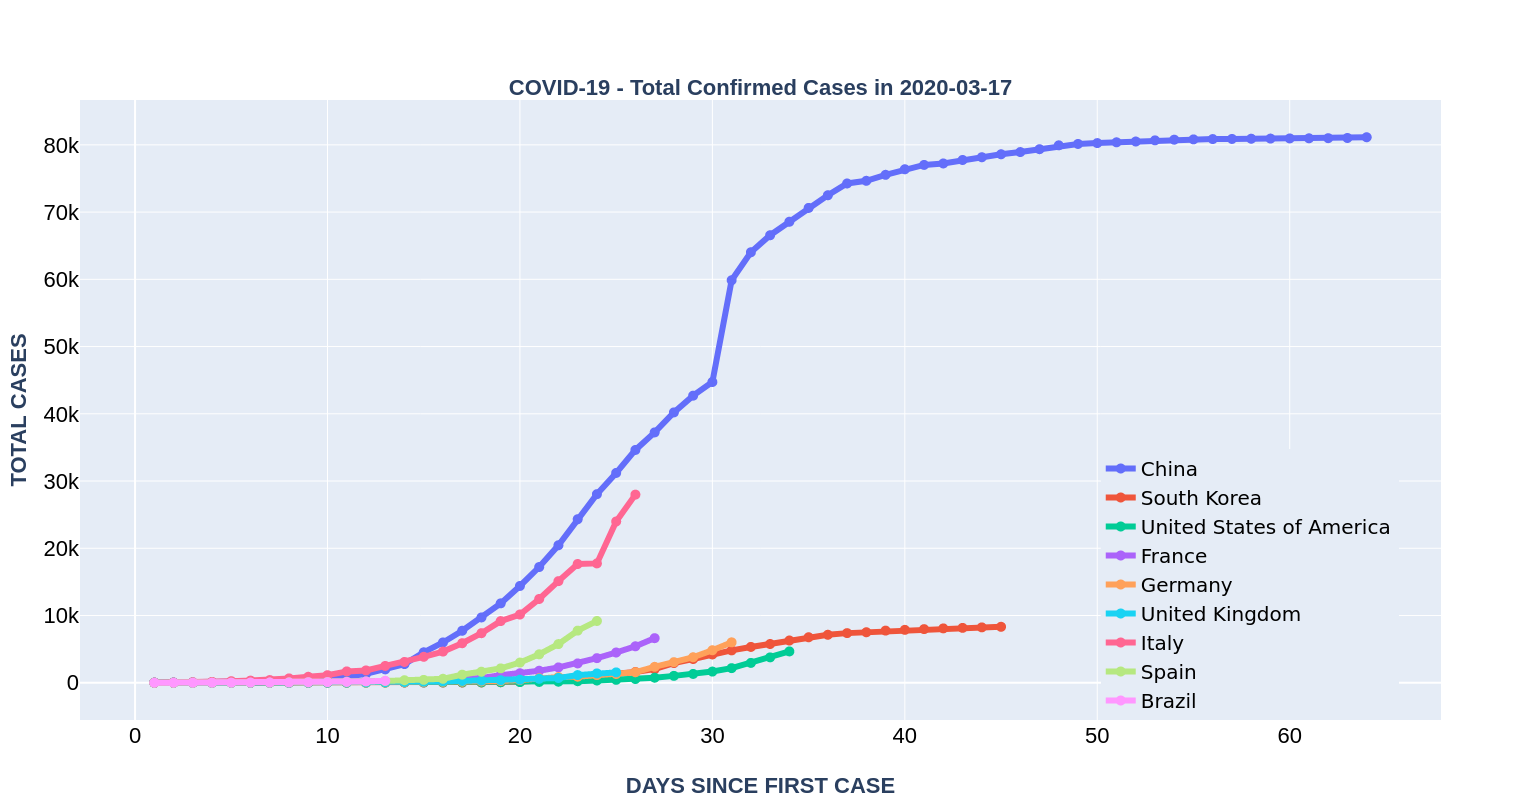

In [82]:
fig

In [83]:
plot(fig, filename="../images/total_lin.html", auto_open=False)
plot(fig, filename="../../sample_pages/images/covid19/total_lin.html", auto_open=False)

'../../sample_pages/images/covid19/total_lin.html'